In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import image
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [3]:
#preprocessing the dataset and getting training data

batch_size = 32
img_height = 180
img_width = 180
main_directory = 'X:/Poralekha Stuff/Jak tests/Cats v Dog/Dataset/train'

train_ds=tf.keras.preprocessing.image_dataset_from_directory(
   main_directory, class_names=['cat','dog'],
    color_mode='rgb', batch_size=32, image_size=(180, 180), shuffle=True, seed=123,
    validation_split=0.2,subset="training")


Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [4]:
#preprocessing the dataset and getting validation data

batch_size = 32
img_height = 180
img_width = 180
main_directory = 'X:/Poralekha Stuff/Jak tests/Cats v Dog/Dataset/train'

val_ds=tf.keras.preprocessing.image_dataset_from_directory(
   main_directory, class_names=['cat','dog'],
    color_mode='rgb', batch_size=32, image_size=(180, 180), shuffle=True, seed=123,
    validation_split=0.2,subset="validation")


Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [5]:
#checking class names

class_names = train_ds.class_names
print(class_names)
class_names = val_ds.class_names
print(class_names)

['cat', 'dog']
['cat', 'dog']


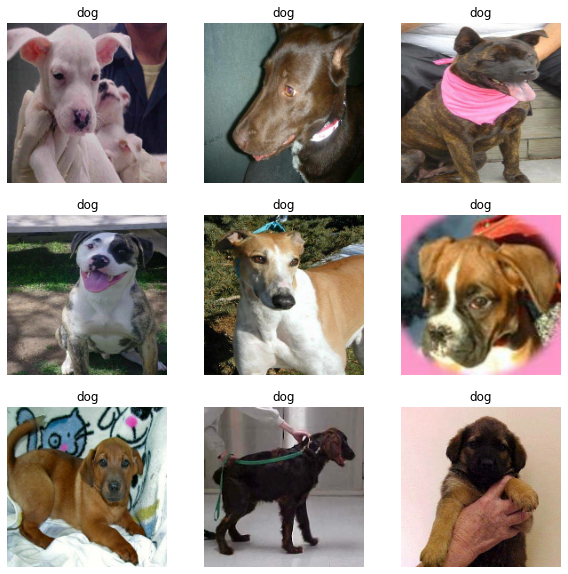

In [6]:
#visualizing the data 

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
#caching the dataset 

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
#creating model 

num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [9]:
#viewing accuracy of the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [10]:
#training 

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
625/625 [==============================] - 422s 676ms/step - loss: 0.5933 - accuracy: 0.6701 - val_loss: 0.5225 - val_accuracy: 0.7424
Epoch 2/10
625/625 [==============================] - 419s 670ms/step - loss: 0.4701 - accuracy: 0.7731 - val_loss: 0.4502 - val_accuracy: 0.7934
Epoch 3/10
625/625 [==============================] - 383s 613ms/step - loss: 0.3875 - accuracy: 0.8259 - val_loss: 0.4235 - val_accuracy: 0.8072
Epoch 4/10
625/625 [==============================] - 360s 576ms/step - loss: 0.3044 - accuracy: 0.8699 - val_loss: 0.4295 - val_accuracy: 0.8002
Epoch 5/10
625/625 [==============================] - 372s 595ms/step - loss: 0.2030 - accuracy: 0.9171 - val_loss: 0.4616 - val_accuracy: 0.8054
Epoch 6/10
625/625 [==============================] - 347s 555ms/step - loss: 0.1055 - accuracy: 0.9596 - val_loss: 0.7357 - val_accuracy: 0.7844
Epoch 7/10
625/625 [==============================] - 461s 738ms/step - loss: 0.0606 - accuracy: 0.9784 - val_loss: 0.8357 -

In [11]:
# Save the weights
model.save_weights('X:/Poralekha Stuff/Jak tests/')



In [11]:
# Create a new model instance
#model = create_model()
# Restore the weights
model.load_weights('X:/Poralekha Stuff/Jak tests/Cats v Dog')
# Evaluate the model
#loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

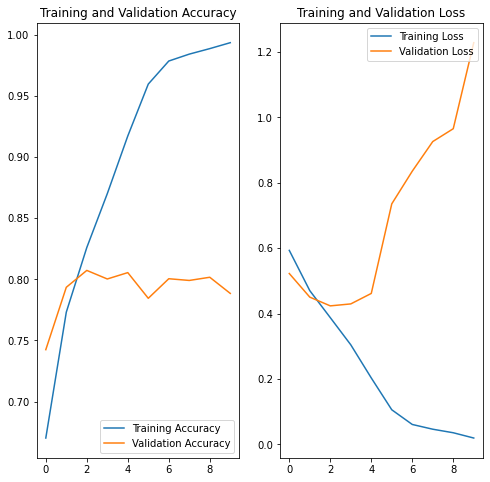

In [12]:
#visualizing training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

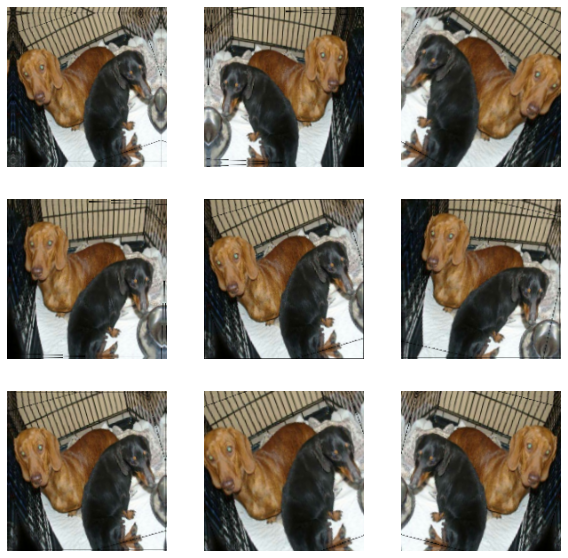

In [13]:
#Augmentation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

#visualizing augmentted data

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [14]:
#introducing dropout 

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
#Training new model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

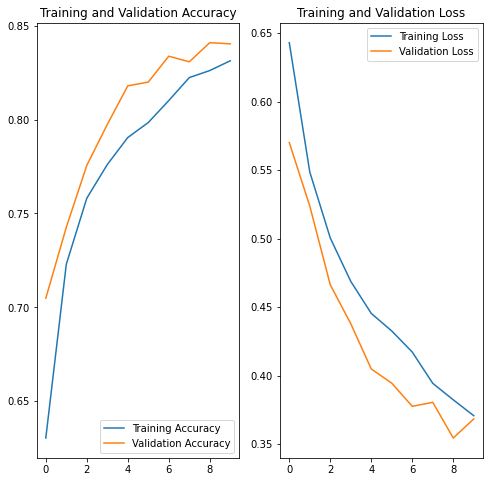

In [16]:
#visualizing new training results 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This image most likely belongs to cat with a 98.79 percent confidence.


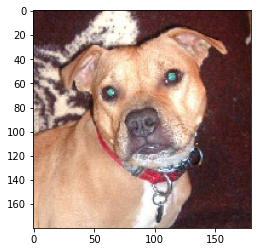

In [43]:
#predicting on new data 

picture_url = "./Dataset/test1/2.jpg"
#picture_path = tf.keras.utils.get_file('2', origin=picture_url)

img = keras.preprocessing.image.load_img(
    picture_url, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
imgplot = plt.imshow(img)

pred = class_names[np.argmax(score)]

if pred == 'dog':
  
    print("This image most likely belongs to dog with a {:.2f} percent confidence."
          .format(100 * np.max(score)))
    
elif pred== 'cat':
    
    print("This image most likely belongs to cat with a {:.2f} percent confidence."
          .format(100 * np.max(score)))
